In [84]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("../utils/import.jl")
using .Import

include("../utils/figs.jl")
using .Figs

# Fig 1

Discounted reward on standard horizon across all algorithms.

State Criteria:
* E[C1] > E[C2] > E[C3]
* all arms stochastic (none deterministic)

State IDs: 
- 1217
- 1226
- 1235
- 1245
- 4586
- 4589
- 4629
- 4638
- 4641
- 1572
- 1712
- 3191
- 3204
- 3437
- 3446
- 3514
- 3526
- 3616
- 4151
- 4426

In [2]:
# Experiment Parameters
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_name, random_name, passive_name = "ATS", "Naive", "Random", "Passive";

# Plotting Parameters
labels = [pomdp_name naive_name random_name passive_name]
discount = 0.999

# ATS
pomdp_expIDs = ["22128_"*x for x in ["051526", "055025", "06251", "07242", "075856", "083337", "09080", "100546", "10400", "113044", "120617", "130613", "13588", "143446", "15378", "161233", "164944", "174134", "184340", "192058"]]

# Naive
naive_expIDs1 = ["base_naive_22127_194"*x for x in ["857", "913", "929", "945"]]
naive_expIDs2 = ["base_naive_22127_195"*x for x in ["01", "017", "033", "049", "15", "120", "136", "152", "28", "224", "240", "255", "311", "327", "343", "358"]]
naive_expIDs = cat(naive_expIDs1, naive_expIDs2, dims=1)

# Random
random_expIDs1 = ["base_rand_act_22127_"*x for x in ["195414", "210743", "212754", "220210", "222350", "225925", "232037", "234123"]]
random_expIDs2 = ["base_rand_act_22128_"*x for x in ["002527", "00453", "010439", "013758", "015719", "021655", "02377", "030644", "033715", "035652", "042637", "044617"]]
random_expIDs = cat(random_expIDs1, random_expIDs2, dims=1)

# Passive
passive_expIDs1 = ["base_rand_B_22127_"*x for x in ["195418", "210747", "212758", "220214", "222355", "225929", "232041", "234127"]]
passive_expIDs2 = ["base_rand_B_22128_"*x for x in ["002530", "00457", "010443", "01382", "015722", "021659", "023711", "030648", "033718", "035655", "042641", "044621"]]
passive_expIDs = cat(passive_expIDs1, passive_expIDs2, dims=1)

# Import Data
s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs)
s_n, t_n, a_n, r_n = Import.import_IDs(naive_expIDs, runs)
s_r, t_r, a_r, r_r = Import.import_IDs(random_expIDs, runs)
s_pa, t_pa, a_pa, r_pa = Import.import_IDs(passive_expIDs, runs)
;

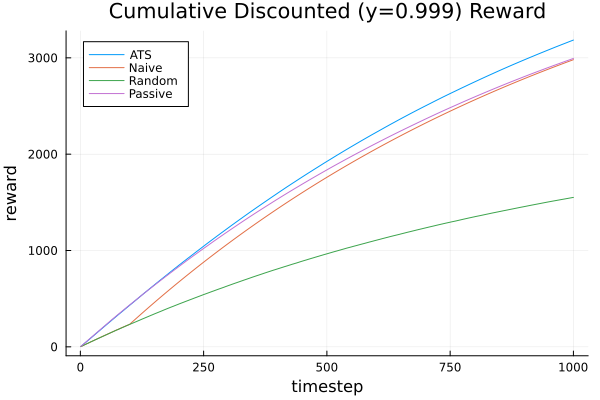

In [3]:
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_n, r_r, r_pa], discount, labels, "Cumulative Discounted (y="*string(discount)*") Reward")

# Fig 2

Teacher queries on standard horizon across all algorithms.

State Criteria:
* E[C1] > E[C2] > E[C3]
* all arms stochastic (none deterministic)

State IDs: same as Fig 1

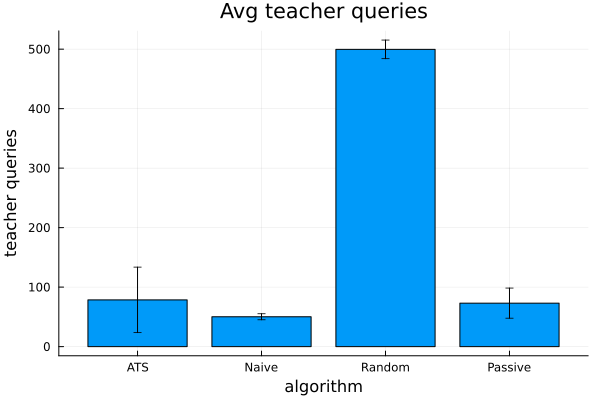

In [4]:
Figs.plot_num_teacher_queries([a_p, a_n, a_r, a_pa], labels, "Avg teacher queries")

# Fig 3

Performance (avg R over last 100 timesteps) across long-horizon large state-space experiments.

State criteria:
* E[C1] > E[C2] >= E[C3]
* all arms stochastic (none deterministic)
* all arms different

States:
- 724392
- 933951
- 265614

In [5]:
# Experiment Parameters
runs = 5
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
interesting_run = 1

# Long-Horizon IDs
long_expIDs = ["23123_"*x for x in ["15073", "152454", "155047"]]

# Import Data - take ~9min
s_l1, t_l1, a_l1, r_l1, beliefs_1, final_states_1, avg_belief_1 = Import.import_experiment(long_expIDs[1], runs)
s_l2, t_l2, a_l2, r_l2, beliefs_2, final_states_2, avg_belief_2 = Import.import_experiment(long_expIDs[2], runs)
s_l3, t_l3, a_l3, r_l3, beliefs_3, final_states_3, avg_belief_3 = Import.import_experiment(long_expIDs[3], runs)
;

In [6]:
s_l = cat(s_l1[1], s_l2[1], s_l3[1], dims=1)
t_l = cat(t_l1, t_l2, t_l3, dims=1)
a_l = cat(a_l1, a_l2, a_l3, dims=1)
r_l = cat(r_l1, r_l2, r_l3, dims=1)
final_states = cat(final_states_1, final_states_2, final_states_3, dims=1)
;

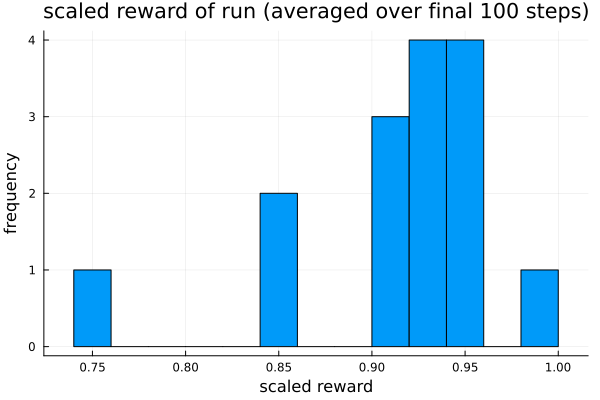

In [7]:
Figs.plot_final_reward_frequency(r_l, s_l, runs)

# Fig 4

**TODO: Make this a picture somehow**

Comparison of inferred state and true state for "interesting run".

State criteria:
* hand-selected from long-horizon large state-space experiments

In [8]:
function print_state(s::Main.Import.State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 1 method)

In [9]:
println("True State:")
print_state(s_l[interesting_run])

println("\nInferred State:")
print_state(final_states_1[interesting_run])

True State:
	 u: [10.0, 10.0, 6.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 10.0)
	 d1: [0.4, 0.2, 0.39999999999999997]	 (exp val 8.4)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 7.6000000000000005)

Inferred State:
	 u: [4.0, 0.0, 0.0]
	 d1: [0.4, 0.6, 0.0]	 (exp val 1.6)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 0.8)
	 d1: [0.2, 0.2, 0.6000000000000001]	 (exp val 0.8)


# Fig 5

Belief in inferred state over training.

State criteria:
* hand-selected from long-horizon large state-space experiments

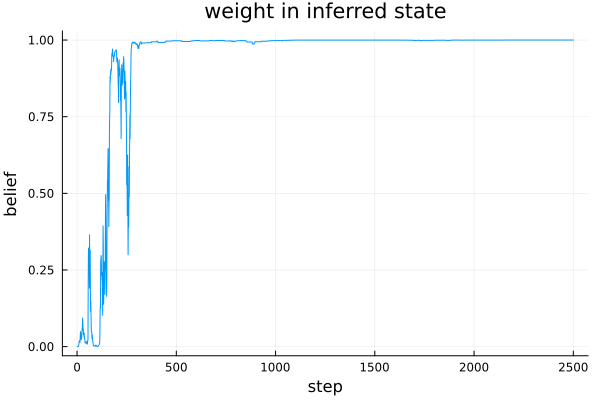

In [10]:
belief = [pdf(b, final_states_1[interesting_run]) for b in beliefs_1[interesting_run]]
plot(belief, legend=false, xlabel="step", yaxis="belief", title="weight in inferred state")

# Fig 6
Accuracy in u estimates v. accuracy in d estimates.

State criteria:
* hand-selected from long-horizon large state-space experiments

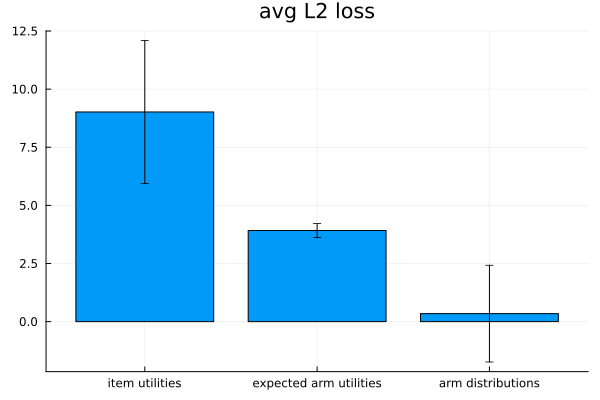

In [11]:
Figs.plot_inferred_state_loss(final_states, s_l)

# Fig 7
Performance of 50/100/200 Naive v. ATS on 3 different horizons (100/1000/2500). 

Performance - discounted reward over time? Or avg reward over run? Or avg reward over final timesteps?

State Criteria:
* E[C1] > E[C2] > E[C3]
* all arms stochastic (none deterministic)

State IDs: same as Fig 1

In [71]:
# Experiment Parameters
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_50_name, naive_100_name, naive_200_name = "ATS", "Naive-50", "Naive-100", "Naive-200";

# Plotting Parameters
labels = [pomdp_name naive_50_name naive_100_name naive_200_name]
discount = 0.999

# ATS
pomdp_expIDs1 = ["23123_"*x for x in ["155213", "180712", "215411"]]
pomdp_expIDs2 = ["23124_"*x for x in ["182839"]]
pomdp_expIDs3 = ["23125_"*x for x in ["120218", "13320", "150024", "16313", "20058"]]
pomdp_expIDs4 = ["23126_"*x for x in ["103630", "120339", "152037", "184616", "205910"]]
pomdp_expIDs5 = ["23127_"*x for x in ["00168", "115315", "143834"]]
pomdp_expIDs6 = ["23128_"*x for x in ["003527", "165157"]]
pomdp_expIDs7 = ["23129_"*x for x in ["160148"]]

# pomdp_expIDs4 = ["22126_"*x for x in ["120218", "13320", "150024", "16313", "20058"]]
pomdp_expIDs = cat(pomdp_expIDs1, pomdp_expIDs2, pomdp_expIDs3, pomdp_expIDs4, pomdp_expIDs5, pomdp_expIDs6, pomdp_expIDs7, dims=1)

# Naive-50
# naive_50_expIDs = ["base_naive_23123_153"*x for x in ["352", "410", "430", "448", "57", "526", "545", "64", "623", "641", "70", "719", "738", "757", "816", "835", "854", "913", "931", "949"]]

# # Naive-100
# naive_100_expIDs = ["base_naive_23123_154"*x for x in ["07", "026", "044", "12", "120", "138", "157", "215", "233", "251", "39", "327", "346", "45", "423", "442", "50", "519", "537", "556"]]

# # Naive-200
# naive_200_expIDs1 = ["base_naive_23123_154"*x for x in ["614", "632", "650", "78", "726", "744", "83", "821", "839", "857", "915", "933", "951"]]
# naive_200_expIDs2 = ["base_naive_23123_155"*x for x in ["09", "027", "045", "13", "121", "139", "157"]]
# naive_200_expIDs = cat(naive_200_expIDs1, naive_200_expIDs2, dims=1)

# Naive-50
naive_50_expIDs1 = ["base_naive_2329_153"*x for x in ["717", "739", "82", "826", "849", "914", "937"]]
naive_50_expIDs2 = ["base_naive_2329_154"*x for x in ["00", "023", "047", "110", "133", "156", "219", "242", "35", "329", "352", "415", "438"]]
naive_50_expIDs = cat(naive_50_expIDs1, naive_50_expIDs2, dims=1)

# # Naive-100
naive_100_expIDs1 = ["base_naive_2329_154"*x for x in ["52", "526", "550", "613", "637", "71", "724", "747", "812", "835", "859", "923", "947"]]
naive_100_expIDs2 = ["base_naive_2329_155"*x for x in ["011", "034", "058", "121", "144", "28", "230"]]
naive_100_expIDs = cat(naive_100_expIDs1, naive_100_expIDs2, dims=1)

# # Naive-200
naive_200_expIDs1 = ["base_naive_2329_155"*x for x in ["253", "316", "339", "42", "426", "449", "513", "535", "60", "624", "647", "710", "733", "757", "820", "844", "98", "931", "955"]]
naive_200_expIDs2 = ["base_naive_2329_160"*x for x in ["019"]]
naive_200_expIDs = cat(naive_200_expIDs1, naive_200_expIDs2, dims=1)


# Import
# s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs)
s_n_50, t_n_50, a_n_50, r_n_50 = Import.import_IDs(naive_50_expIDs, runs)
s_n_100, t_n_100, a_n_100, r_n_100 = Import.import_IDs(naive_100_expIDs, runs)
s_n_200, t_n_200, a_n_200, r_n_200 = Import.import_IDs(naive_200_expIDs, runs)
;

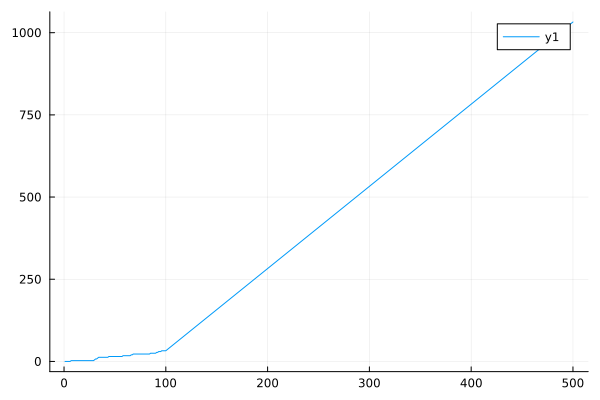

In [64]:
plot(cumsum(r_n_50[4][1:500]))

In [72]:
length = size(r_p)[1]
r_short = [[r[1:100] for r in exp] for exp in [r_p, r_n_50[1:length], r_n_100[1:length], r_n_200[1:length]]]
r_med = [[r[1:500] for r in exp] for exp in [r_p, r_n_50[1:length], r_n_100[1:length], r_n_200[1:length]]]
r_long = [[r[1:2000] for r in exp] for exp in [r_p, r_n_50[1:length], r_n_100[1:length], r_n_200[1:length]]]
;

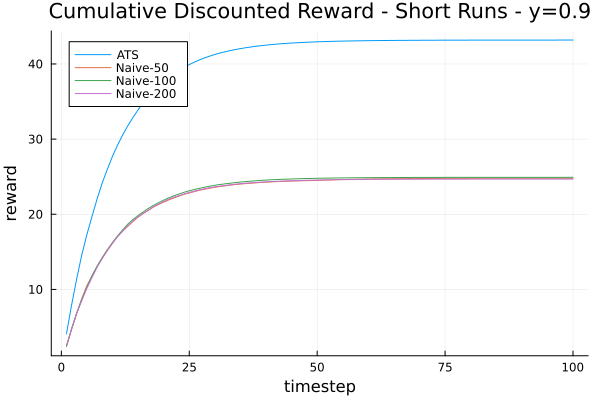

In [73]:
discount = 0.9
Figs.plot_cumulative_avg_r_multiple_experiments(r_short, discount, labels, "Cumulative Discounted Reward - Short Runs - y="*string(discount))

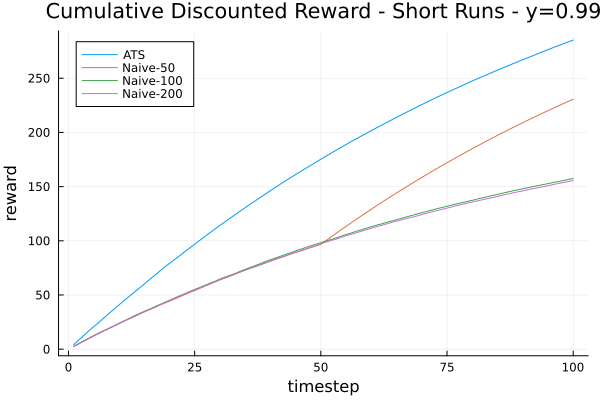

In [74]:
discount = 0.99
Figs.plot_cumulative_avg_r_multiple_experiments(r_short, discount, labels, "Cumulative Discounted Reward - Short Runs - y="*string(discount))

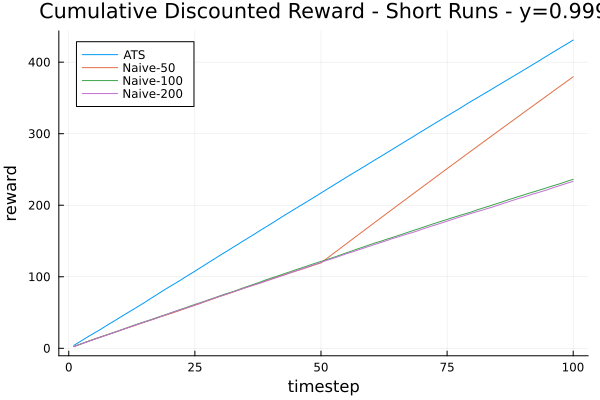

In [75]:
discount = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments(r_short, discount, labels, "Cumulative Discounted Reward - Short Runs - y="*string(discount))

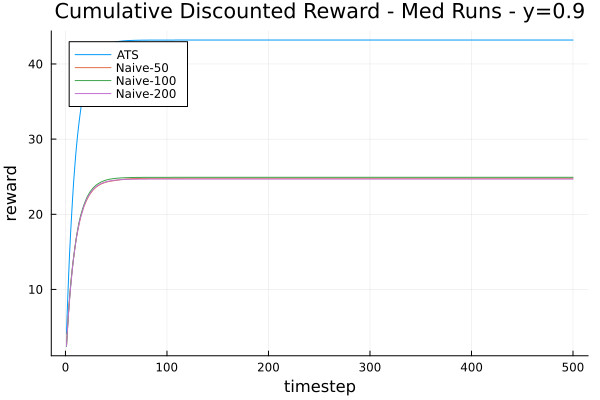

In [76]:
discount = 0.9
Figs.plot_cumulative_avg_r_multiple_experiments(r_med, discount, labels, "Cumulative Discounted Reward - Med Runs - y="*string(discount))


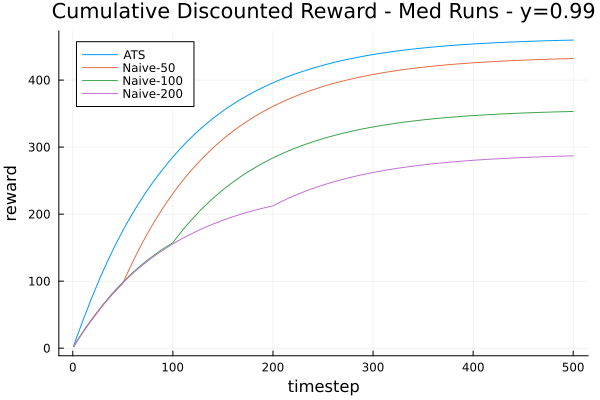

In [77]:
discount = 0.99
Figs.plot_cumulative_avg_r_multiple_experiments(r_med, discount, labels, "Cumulative Discounted Reward - Med Runs - y="*string(discount))


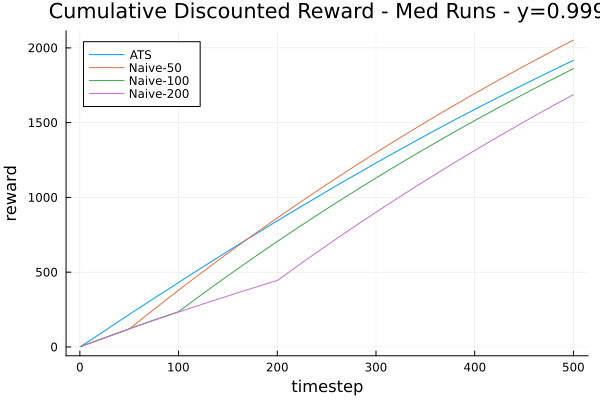

In [78]:
discount = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments(r_med, discount, labels, "Cumulative Discounted Reward - Med Runs - y="*string(discount))


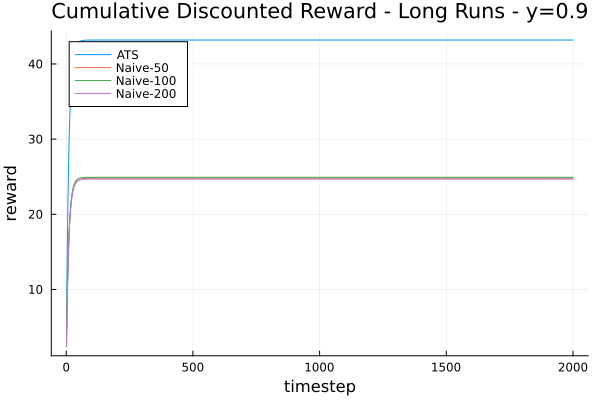

In [79]:
discount = 0.9
Figs.plot_cumulative_avg_r_multiple_experiments(r_long, discount, labels, "Cumulative Discounted Reward - Long Runs - y="*string(discount))

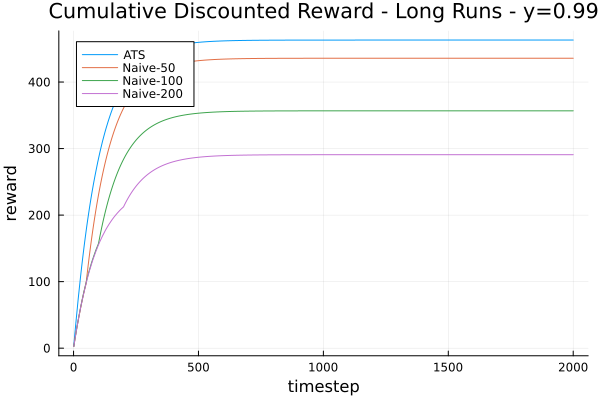

In [80]:
discount = 0.99
Figs.plot_cumulative_avg_r_multiple_experiments(r_long, discount, labels, "Cumulative Discounted Reward - Long Runs - y="*string(discount))

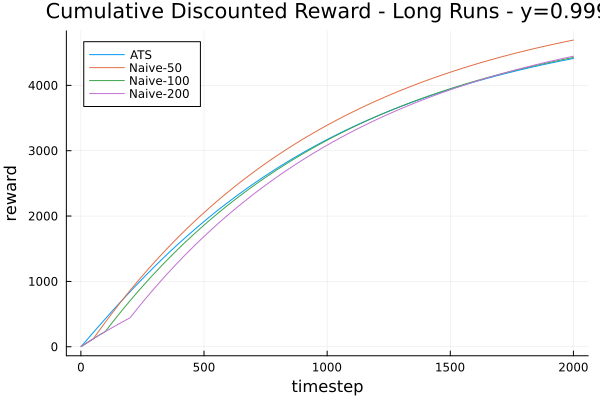

In [81]:
discount = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments(r_long, discount, labels, "Cumulative Discounted Reward - Long Runs - y="*string(discount))

# Fig 8

Accuracy of inferring beta.

(See `infer_B` notebook.)